![Banner](logo.png)
<h1><center>ROSSMANN SALES ANALYSIS</center></h1>

# Introduction

This analysis is based on a [Kaggle dataset](https://www.kaggle.com/c/rossmann-store-sales) about Rossmann's sales.

Rossmann is a German drugstore chain which has more than 3000 shops in 7 countries. This dataset is only based on the German based shops, 1115 in total.

This project will be divided into 2 main parts: 

- Understanding the current situation, by cleaning the data and exploring it (EDA).

- Forecasting the sales that are depending on factors such as promotions, competition, school holidays, state holidays, seasonality, and locality.

For the first step, I am using Python programming language and libraries such as Pandas, Matplotlib, Seaborn and Plotly for data cleaning, analysis and visualization.

The second step is done using scikit a Python library for Machine learning and Prophet for Time Series Forecasting.

![Banner](rossmann_banner.png)

# Data Import and Cleaning

**1 - Install the needed libraries and packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import calendar
from scipy import stats
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import plotly.graph_objs as go 
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


As a first step I import all the libaries needed to achieve this project.

**2 - Data import**

The project comes with 2 CSV files holding information about the 1115 shops sales activity that we are about to analyze. The first CSV file is called **train** and contains historical sales data and the second one called **stores** contains supplemental information about the stores. 
Let's read the files and print their top entries.

In [2]:
store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')

**3 - Discover the data**

Those are the first 5 rows of the **store** data frame:

In [3]:
print("In total: ", store.shape)
store.head()


In total:  (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Those are the first 5 rows of the **train** data frame:

In [4]:
print("In total: ", train.shape)
train.head()

In total:  (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Most of the fields are self-explanatory, but some are not, I invite you to check the [Kaggle project page](https://www.kaggle.com/c/rossmann-store-sales) explaining the data fields. 

Let's get more information about it:



In [5]:
store.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             10

In [6]:
store.describe()


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [7]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


**4 - Data cleaning**

From the above, we can confirm that there are 1115 unique stores, but also that both tables have a common column 'store' which is useful for a potential table joining. 

The **.describe()** method gives us a statistical summary about each data frame. Also, we discover how large is the **train** dataset, stocking more than 1 million daily sales. The next step is to find out if the data frames need to be cleaned.

After checking, I can confirm that the datasets don't have duplicate rows, which has been checked with the following code: **store.drop_duplicates()** and **train.drop_duplicates()**. However, we can see that the tables contain some missing values. Let's find out how many!

In [8]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

As you can see the **store** data frame is missing some values, but the **train** one doesn't. If we compare 544 or 354 to the total number of rows in the store dataset (more than 1 million) we can easily take the decision to drop those missing rows. But first let's check how related they are using <a id='https://github.com/ResidentMario/missingno'>Missingno </a> on the **store** dataset. 

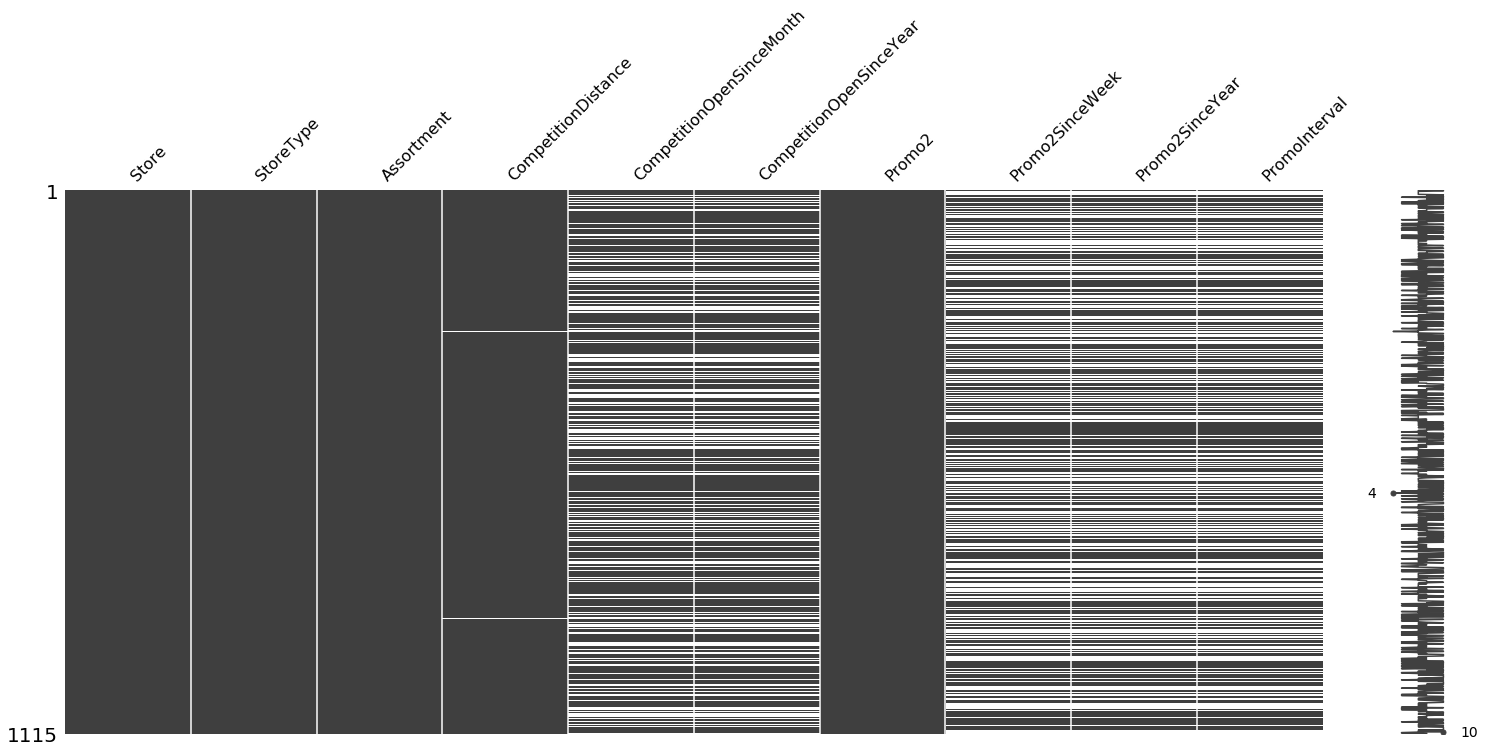

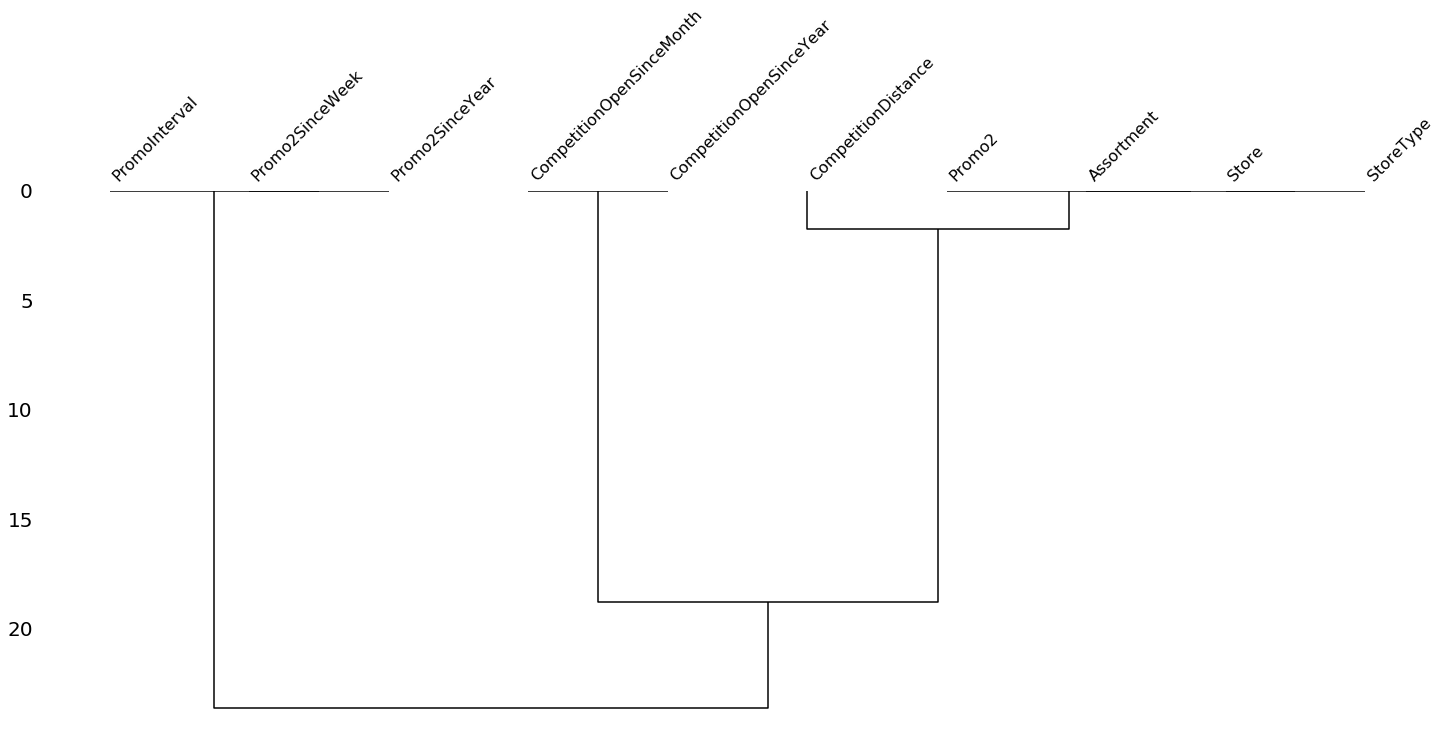

In [10]:
import missingno as msno
msno.matrix(store)
msno.dendrogram(store)

From this matrix we can confirm that the missing columns are linked together having the same number of missing values therefore removing all of them could be an option, however I decide to replace the missing values of the **CompetitonDistance** with the mean of the column itself.

Regarding the **Promo2sinceweek**, **Promo2SinceYear** and **PromoInterval** we can see in the code below that the reason why there have NaN values is because there have no **promo2** which mean no consecutive promotion from that day, in that case instead of dropping them I am replacing the missing values with 0.  

In [11]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [12]:
#Check if there are NaN values when the promo2 is not on meaning equals 0.
bb = store[pd.isnull(store.Promo2SinceWeek)]
bb[bb['Promo2'] != 0].shape

(0, 10)

In [13]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
store.fillna(0, inplace = True)
#store = store.dropna(axis=0)

Now that we replaced accordingly the missing values, we can check again to see if they have been filled up properly.

In [14]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**5 - Data type update**

From the data discovery subsection, we discovered the preassigned data types for each data frame columns, with the command: **store.info()** and **train.info()**. Let's now be more specific about the each column's type.

In [15]:
#creating for loops to change the data type of the columns from both dataframes.For example, columns such as 'Open' or 'Promo"
#can be indentified as booleans holding value of 0 when it's False and 1 when it's True, 
#therefore the boolean type if more appropriate.

for col in ['StoreType','Assortment','Promo2']:
    store[col]= store[col].astype('category')
    
for col in ['Promo2']:
    store[col]= store[col].astype('bool')
    
for col in ['Open', 'Promo', 'StateHoliday','SchoolHoliday']:
    train[col]= train[col].astype('bool')
    
for col in ['DayOfWeek']:
    train[col]= train[col].astype('category')
    
train['Date'] = pd.to_datetime(train['Date'])

We can now read the info for each data frame and confirm that the new data types have been implemented. 

In [16]:
train.info()
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null category
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null bool
Promo            1017209 non-null bool
StateHoliday     1017209 non-null bool
SchoolHoliday    1017209 non-null bool
dtypes: bool(4), category(1), datetime64[ns](1), int64(3)
memory usage: 35.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null category
Assortment                   1115 non-null category
CompetitionDistance          1115 non-null float64
CompetitionOpenSinceMonth    1115 non-null float64
CompetitionOpenSinceYear     1115 non-null float64
Promo2                     

As you can see, the changes have been applied, taking the 'Open' column as example again, it is now marked as 'bool' for booleans. 

**6 - Expand the data frames**

Now that we have cleaned the data frames and updated the values' types. We can think about adding new columns that will simplify our analysis. 

In this particular case, I would like to create and **Dayoftheweek** column stating in letters the days of the week eg:'Tuesday', but also to extract the **Month** and the day of the month, from the **Date** column of the **train** data frame and to finish to create a column stating if the sales are from a weekday or a weekend.

In [17]:
train['Month']=train['Date'].dt.month #extract the month  (ex: 12)
train['Year']=train['Date'].dt.year #extract the year (ex: 2011)
train['Day']=train['Date'].dt.day #extract the day (ex: 1)
train['Dayoftheweek']=train['Date'].dt.weekday_name #(ex: Monday)

#using mapping and lambda expression to replace to create a month column with the month abreviations

look_up = {1: 'Jan', 2: 'Feb', 3: 'Mrch', 4: 'April', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct',11:'Nov',12: 'Dec'}

train['Monthofyear']  = train['Month'].apply(lambda x: look_up[x])


def dayofweeksplit(x):
    if x in [1,2,3,4,5]:
        return 'Weekdays'
    else:
        return 'Weekends'

train['DayOfWeekCat'] = train['DayOfWeek'].apply(dayofweeksplit)

train['AOV'] = train['Sales']/train['Customers']


Now that we have created the colums we can have another look at the **train** data frame sample.

In [18]:
train.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,Dayoftheweek,Monthofyear,DayOfWeekCat,AOV
314757,928,4,2014-10-09,7840,681,True,True,True,True,10,2014,9,Thursday,Oct,Weekdays,11.512482


It worked, 6 new columns have been created! **Month**, **Year**, **Day**, **Dayoftheweek**, **Monthofyear** and **Weekcat**.

**7 - Create a new data frame**


I find both data frames interesting, but joining them will give us more insights.
I will then join them on their common column **Store**.
To start, we need to work on the **train** data frame grouping each row by **store** number in order to be able to merge it with the **store** dataframe holding only unique values in this specific column.

In [19]:
#Sum the train dataframe by store number summing up the others columns 
trainsumbystore = train.groupby('Store').sum().reset_index()
 
#Merge the two datasets 
#mergedtable = pd.merge(trainsumbystore, store, on='Store')
mergedtable = pd.merge(train, store, how = 'inner', on = 'Store')
mergedtable.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,...,AOV,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,True,True,True,True,7,...,9.482883,c,a,1270.0,9.0,2008.0,False,0.0,0.0,0
1,1,4,2015-07-30,5020,546,True,True,True,True,7,...,9.194139,c,a,1270.0,9.0,2008.0,False,0.0,0.0,0
2,1,3,2015-07-29,4782,523,True,True,True,True,7,...,9.143403,c,a,1270.0,9.0,2008.0,False,0.0,0.0,0
3,1,2,2015-07-28,5011,560,True,True,True,True,7,...,8.948214,c,a,1270.0,9.0,2008.0,False,0.0,0.0,0
4,1,1,2015-07-27,6102,612,True,True,True,True,7,...,9.970588,c,a,1270.0,9.0,2008.0,False,0.0,0.0,0


Now we have 3 main datasets, **train**, **store** and the **mergedtable**.

# Data Analysis

I am now going to answer few questions that I find interesting, in order to understand Rossmann's current situation.

**1 - Yearly and monthly sales evolution**

From the graph below we can see that we don't have any record for the end of the year 2015.
If we focus on the first 6 months for each year, a natural growth year over year is noted except for the month of March where the sales of 2013 were better than the ones from 2014 which equals to a drop of about 4%.

The biggest growth during these 6 months was in June, comparing 2014 and 2015 we note an increase of about 9%. Also, the less performing month is Feburary. I assume that the number of bank holidays and the short month could impact the sales, however, December is the best performing month.

Regarding the second half of the year, comparing 2013 and 2014, the shops were peforming much worst in 2014. For this observation, the negative growth is about -13,22% (calculated below the graph).


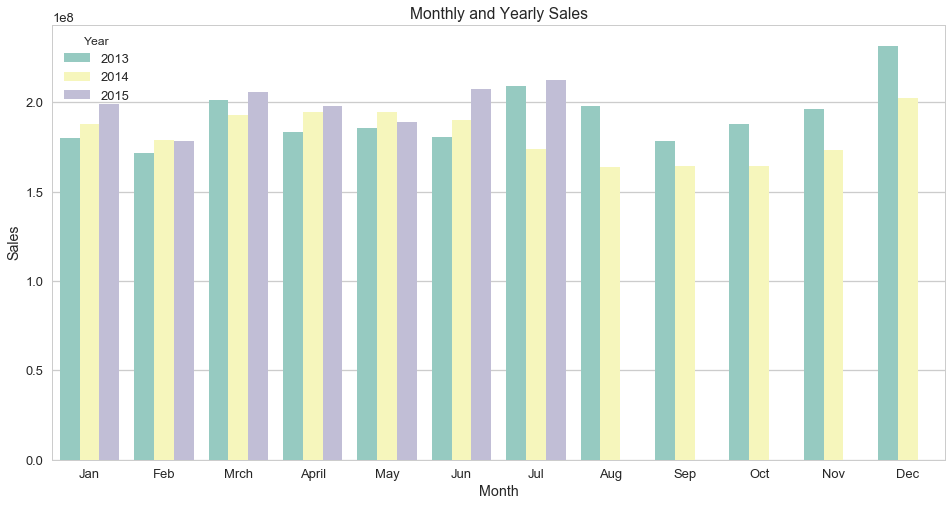

In [20]:
sns.set_style('whitegrid')
sns.set_palette('Set3')

salesintime = train[['Year','Month','Sales']].groupby(['Year','Month']).sum().reset_index()

sns.set_context("talk")
plt.figure(figsize = (16,8))

g=sns.barplot(x='Month', y='Sales', data = salesintime, hue='Year')
g.set(xticks=[0,1,2,3,4,5,6,7,8,9,10,11], xticklabels= ['Jan','Feb','Mrch','April', 'May',
             'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec'])
g.set_title('Monthly and Yearly Sales')


In [21]:
#Growth calculation regarding the second half of the year 2014 vs 2013
cc = train [['Year','Month','Sales']].groupby(['Year','Month']).sum().reset_index()

#Create a variable filtering by month and year

cc2013 = cc[(cc['Month']>=7) & (cc['Year']==2013)]
cc2013 = cc2013['Sales'].sum()

cc2014 = cc[(cc['Month']>=7) & (cc['Year']==2014)]
cc2014 = cc2014['Sales'].sum()

#apply the formula

growth = ((cc2014-cc2013)/cc2013)*100
growth

-13.216506246823851

This second graph shows the sales by day of the month, each daily sales have been summed up then divided by the number of sales to get the average. We can actually notice a trend:
The first day of the month is actually the worst one in terms of sales and in average.
There is an increase in sales at the beginning of the month, in the middle and at the end, the 3 highest points being the 2nd, the 16th and the 30th of each month.

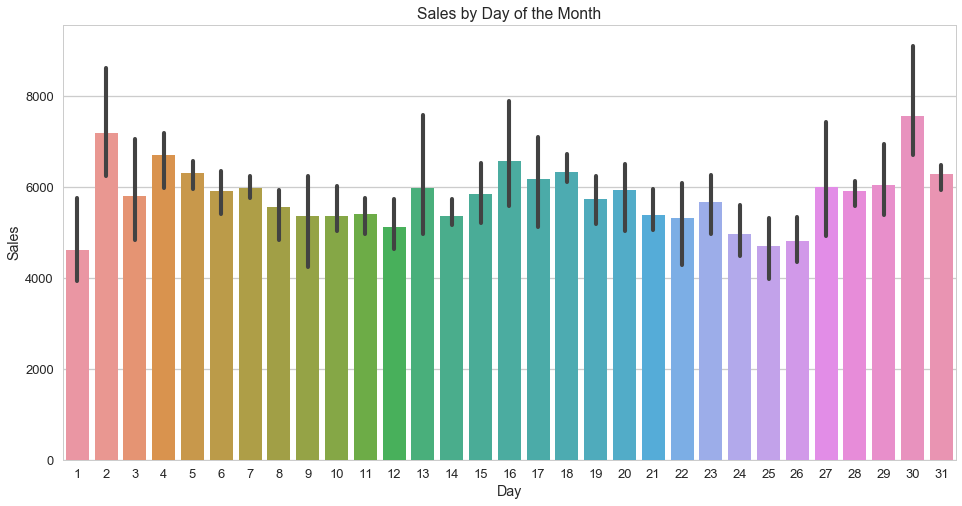

In [22]:
salesintime = train[['Year','Day','Sales']].groupby(['Year','Day']).mean().reset_index()

sns.set_context("talk")
plt.figure(figsize = (16,8))

g=sns.barplot(x='Day', y='Sales', data = salesintime).set_title('Sales by Day of the Month')

**2 -  What are the top 20 best selling stores? **

This is a simple barplot showing the top 20 best performing stores in terms of sales. It would have been ideal to get the geographical location for the shops but with the information provided, the shop number 262 generated the highest revenue, 19.52 million.

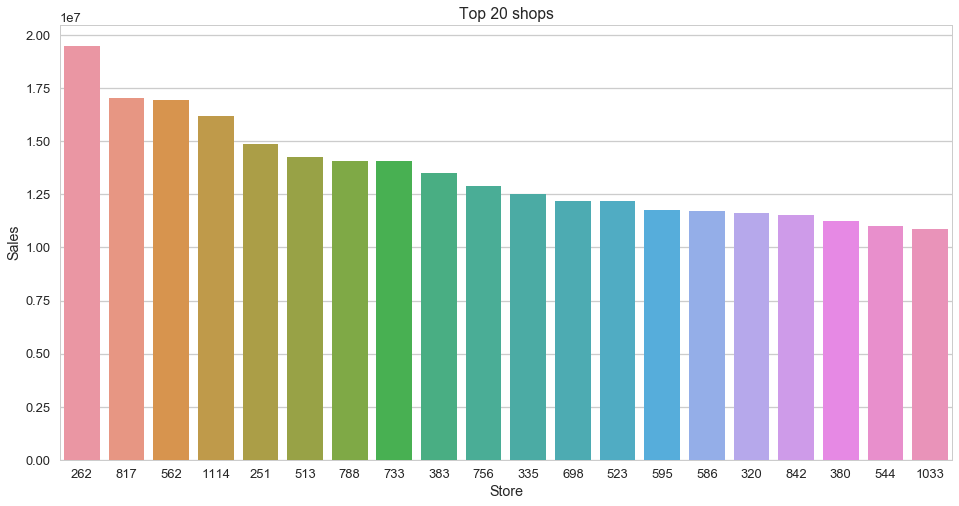

In [23]:
#Create a dataframe with the store id and the adequate sales
topshop =train [['Store','Sales']]

#Group by store
topshop = topshop.groupby('Store').sum()

#Sort the dataframe by order descending
topshop =topshop.sort_values('Sales', ascending=False)

#Grab the top 20 shops
topshop = topshop.head(20).reset_index()

#plot it
plt.figure(figsize = (16,8))

sns.barplot(x='Store', y='Sales', data=topshop, order=topshop['Store']).set_title('Top 20 shops')

**3 - Revenue and average basket value (ABS) by month and day of the week**

Which day of the week or month generates the highest revenue, and ABS (Average Basket Size)? I created two separate graphs side by side to ease the comparison.

Regarding the sales graphs on the left, the beginning of the week is when the stores are generating more money, on Mondays and Tuesdays, the third best day is on Fridays.

Which is also applicable for the ABS, except that it's exceptionally higher on Wednesday than on Friday, respectively at 9.08 and 9.04 euros.


If we have a look at the right graph, representing the sales and ABS by month, we can note that March and July are the best performing months in terms of sales. But, the ABS is higher in December with 9.71 euros spent in average and 9.24 euros in July.

In [24]:
#Create two new dataframe

basketweek = train[['Dayoftheweek','Sales','Customers']]
basketweek = basketweek.groupby('Dayoftheweek').sum()
basketweek = basketweek.sort_values(by='Sales',ascending = False)
basketweek = basketweek.reset_index()
basketweek['Basket'] = basketweek['Sales'] / basketweek['Customers'] 

basketmonth = train[['Monthofyear','Sales','Customers']]
basketmonth = basketmonth.groupby('Monthofyear').sum()
basketmonth = basketmonth.sort_values(by='Sales',ascending = False)
basketmonth = basketmonth.reset_index()
basketmonth['Basket'] = basketmonth['Sales'] / basketmonth['Customers'] 


#Create the format of our plot grid

fig = tools.make_subplots(rows=1,
                          cols=2,
                          print_grid=True,
                          horizontal_spacing=0.18
                        
                         )

#Define the 4 traces 

trace1 = dict(type='bar',
              x= basketweek[('Dayoftheweek')], 
              y= basketweek[('Sales')],
              name='Sales',            
              marker=dict(color= 'rgba(220,49,72, 0.8)', 
                          line= dict(width= 1)),
              showlegend=False
             )
 

trace2 = dict(type='scatter',
              x= basketweek[('Dayoftheweek')], 
              y= basketweek[('Basket')], 
              marker= dict(line= dict(width= 1), 
                           size= 8), 
              line=dict(color= '#B0122C',
                        width= 1.5),
              name= 'ABS',
              showlegend=False
             )


trace3=dict(type='bar',
            x=basketmonth[('Monthofyear')],
            y=basketmonth[('Sales')],
            name='Sales',
            marker=dict(color= 'rgba(220,49,72, 0.8)', line= dict(width= 1)),
            showlegend=False 
          )
trace4=dict(type='scatter',
            x= basketmonth[('Monthofyear')],
            y=basketmonth[('Basket')],
            marker= dict(line= dict(width= 1), 
                         size= 8), 
            line=dict(color= '#B0122C', width= 1.5),
            name= 'ABS',
            showlegend=False
           )

# Append the first two traces to subplot (1,1), and the last two, to subplot (1,2):

fig.append_trace(trace1, 1, 1)# trace1 is in position 0 of the list fig['data]
fig.append_trace(trace2, 1, 1)#                       1 
fig.append_trace(trace3, 1, 2)#                       2
fig.append_trace(trace4, 1, 2)#                       3

# Now we update yaxis for both trace2 and trace4 - meaning positon 1 and 3
fig['data'][1].update(yaxis='y3')
fig['data'][3].update(yaxis='y4')

# Update layout


fig['layout'].update(autosize= False, 
              width= 800, 
              height= 500, 
              showlegend=False,
                     title='Sales and ABS by day of the week and month',hovermode='x')


fig['layout']['xaxis1'].update(tickangle= -45, #'x1'
                         autorange=True,
                         tickfont=dict(size= 10), 
                         title= 'Days of the Week', 
                         type= 'category',
                         )
fig['layout']['yaxis1'].update( #left yaxis'y1
                         showgrid=True, 
                         title= 'Sales',
                         )

#Insert a new key, yaxis3, and the associated value:
fig['layout']['yaxis3']=dict(
                          overlaying= 'y1', 
                          anchor= 'x1', 
                          side= 'right', 
                          showgrid= False, 
                          title= 'ABS'
                         )

fig['layout']['xaxis2'].update(autorange=True,
                         tickfont=dict(size= 10), 
                         title= 'Months', 
                         type= 'Months',
                         )
fig['layout']['yaxis2'].update(
                         showgrid=True, 
                         title= 'Sales',
                         )
#Insert a new key, yaxis4, and the associated value:
fig['layout']['yaxis4']=dict(
                          overlaying= 'y2', 
                          anchor= 'x2', 
                          side= 'right', 
                          showgrid= False, 
                          title= 'ABS'
                         )

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



**4 -  Is the revenue varying depending on the store type? **

In addition to the store listing, there is the store type to consider. Indeed, it's interesting here to see if a store type is performing better than another.

The **store type A** is the best performing one, generating more than 3 billion of euros which is about 2 times what's the **store type D** is generating and about 4 times what the **store type C** is generating. Those 3 stores types also have the highest number of customers.

The **store type B** has the lowest sales' record with 160 millions, but this storetype has the best average sales result and much less entries for this storetype so less customers. 

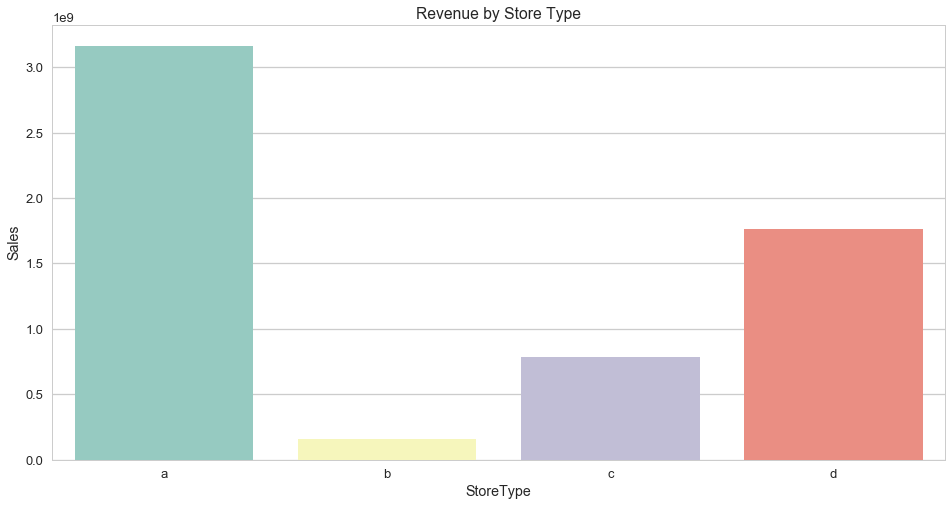

In [25]:
#create new df with needed cols
salesstoretype= mergedtable[['StoreType', 'Sales']]

#group by 'storetype' and sym the 'sales'
salesstoretype= salesstoretype.groupby('StoreType').sum().sort_values(by='Sales',ascending=False)

#reset the index to be able to plot it
salesstoretype= salesstoretype.reset_index()

#plot it
plt.figure(figsize = (16,8))
sns.barplot(x='StoreType', y='Sales', data=salesstoretype).set_title('Revenue by Store Type')
sns.set_style('whitegrid')
sns.set_palette('Set3')

In [26]:
custandsales = mergedtable.groupby('StoreType')['Customers', 'Sales'].sum()
custandsales.sort_values(['Customers', 'Sales'], ascending=False)

,Customers,Sales
StoreType,,
a,363541434,3165334859
d,156904995,1765392943
c,92129705,783221426
b,31465621,159231395


In [27]:
mergedtable.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


**5 - Revenue, Customers and AOV by store type depending on the promotion status**

We have previously analysed the **ABS** and **revenue** by month in a general way, below we will have a closer look at those metrics by adding a **storetype** and **promotion status** comparison.

Generally speaking, the **promotion** on have a strong impact on the number of sales, this is the case for storetype 'a'but more difficult to see for the other type of stores. We note a similar peak in July for the store of type 'a', 'c' and 'd' when the sales are on. To finish it seems that the promotions are not impact that much the sales from the shops of type 'b'.

Also, the promotions of month of December don't seem to impact the sales either.

The same trend is noted regarding the number of customers, we can assume a positive correlation.

The last factor plot is comparing the AOV per stroretype and promotions status, which allow us to see that people spend more when promotion are on regardless the storetype and spend much more in December. If we take the storetype 'd' to illustrate the trend, people spend in average 13 euros when promotions are on versus 11 euros in normal days.

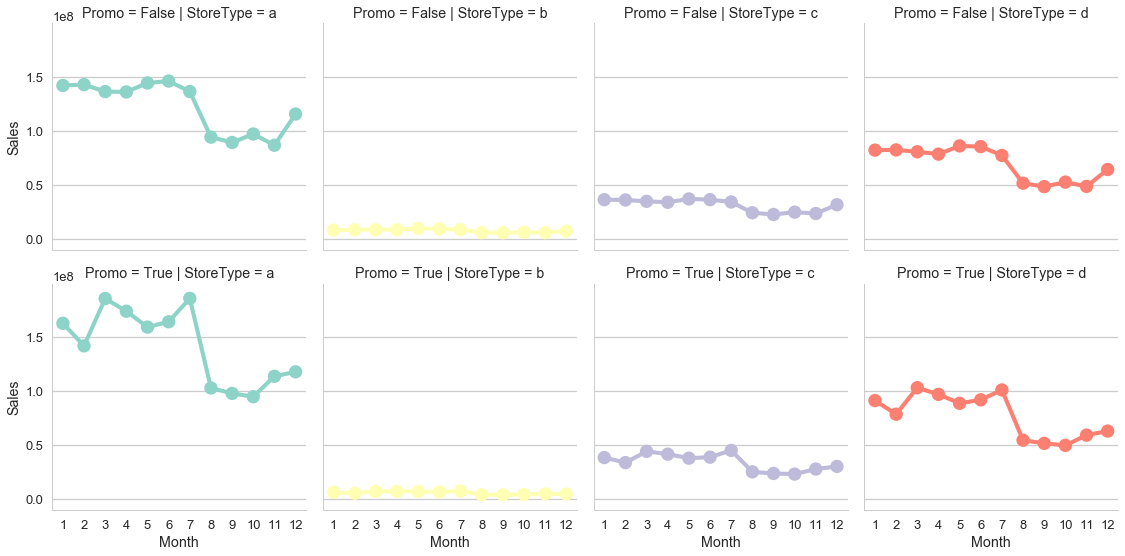

In [28]:
cc = mergedtable[['Sales','Month','StoreType','Promo']].groupby(['StoreType','Month','Promo']).sum().reset_index()
sns.factorplot(data = cc, x = 'Month', y = "Sales", 
               col = 'StoreType',               
               hue = 'StoreType',
               row = 'Promo') 

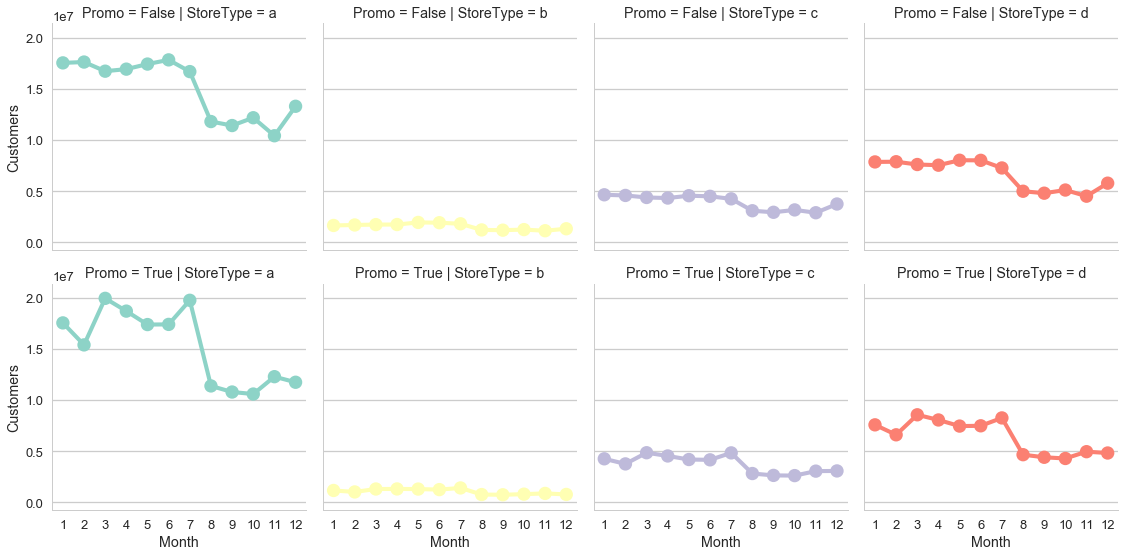

In [29]:
#Customers by store type depending on the promotion status
cc = mergedtable[['Customers','Month','StoreType','Promo']].groupby(['StoreType','Month','Promo']).sum().reset_index()
sns.factorplot(data = cc, x = 'Month', y = "Customers", 
               col = 'StoreType',               
               hue = 'StoreType',
               row = 'Promo') 

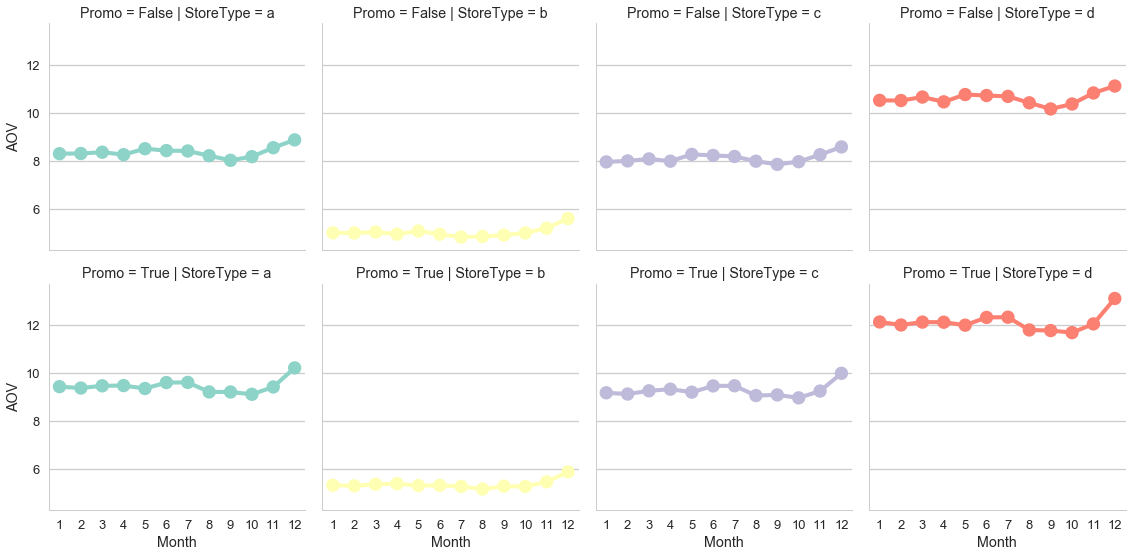

In [30]:
# AOV by store type depending on the promotion status
sns.factorplot(data = mergedtable, x = 'Month', y = "AOV", 
               col = 'StoreType', 
               hue = 'StoreType',
               row = 'Promo' 
               ) 

**6 -  What are the best selling assortment? **

We have seen that there are different types of store, we now going to compare the assortment types.

It's interesting to see that the assortment 'a' is better sold in the stores of type 'a', and that the assortment 'c' is also better sold in the stores of type 'a' but the storetype 'd' is also performing well. To finish the assortments are sold equally in the stores of type 'c'.

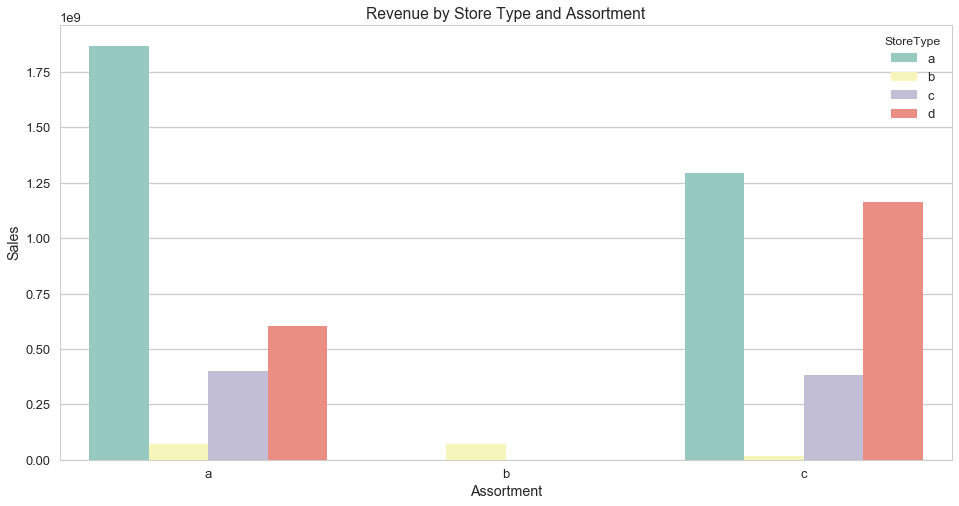

In [31]:
salesassortment= mergedtable[['StoreType','Assortment', 'Sales']]
salesassortment= salesassortment.groupby(['StoreType','Assortment']).sum().sort_values(by='Sales',ascending=False).reset_index()

a = salesassortment[salesassortment['StoreType']=='a']
b = salesassortment[salesassortment['StoreType']=='b']
c = salesassortment[salesassortment['StoreType']=='c']
d = salesassortment[salesassortment['StoreType']=='d']

plt.figure(figsize = (16,8))
sns.barplot(x='Assortment', y='Sales', data=salesassortment, hue='StoreType').set_title('Revenue by Store Type and Assortment')

** 7 - How are the columns correlated? **

Here, I have created this pair plot to have a quick idea or confirmation of the potential correlation between columns in the 'mergedtable' table. We can confirm the positive correlation between the number of customers and sales which was guessable in other words when the number of customer increases the sales are increasing. Regarding the sales and the competition, we don't see a clear correlation. It would be however interesting to see if the fact the competitor is close to a Rossmann shop influences the sales or not.

In [32]:
cc = mergedtable[['Store','Sales','Customers','CompetitionDistance',
                          'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth',
                          'Promo2SinceWeek']]

#sns.pairplot(cc)

#sns.set_style('whitegrid')
#sns.set_palette('Set3')

The heatmap below, also shows the correlation between columns.

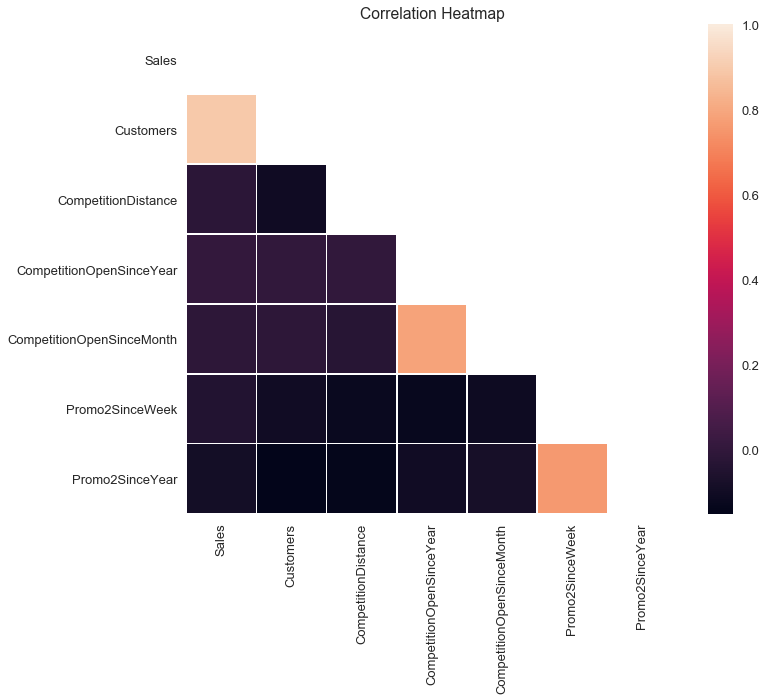

In [33]:
sns.set_style('whitegrid')
sns.set_palette('Set3')

m = mergedtable[['Sales','Customers','CompetitionDistance',
                 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 
                 'Promo2SinceWeek', 'Promo2SinceYear','PromoInterval']]
m = m.corr()

plt.figure(figsize = (11,9))
mask = np.zeros_like(m)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(m, linewidths=.5,mask=mask).set_title('Correlation Heatmap')

** 8 - How is the competition distance linked to the sales? **

From the heatmap above we can see that the positive correlations are not surprising and most of the columns a poorly correlated. 

We are now creating a plot, with axes representing different bins and their respective Sales. 

The idea is to see if the distance of the first competitor influences the sales.

We can note based on the histogram below that the highest sales are made when the first competitor is located between 0 and 250 meters but this trend is not necessarily decreasing with the distance being higher.

As you can see on this graph the closer the competitor the better it is for Rossmann, however, it starts dropping from 250 meters and increasing again from 1000 meters.

I would assume that the competition is beneficial to Rossmann because they are able to attract customers from the competition with campaigns or a better assortment when both shops are separated by a short walking distance.

From 250 to 1000 the walking distance is still acceptable but the 2 shops are more spread, people will then probably choose the one close to their current location (house, office). 

And to finish from 1000 and above the revenue is increasing with the distance, the further the competition is the better for Rossmann, probably because the distances are way bigger, and easier to reach the shop via public transportation or car, therefore people would choose the closest shop.


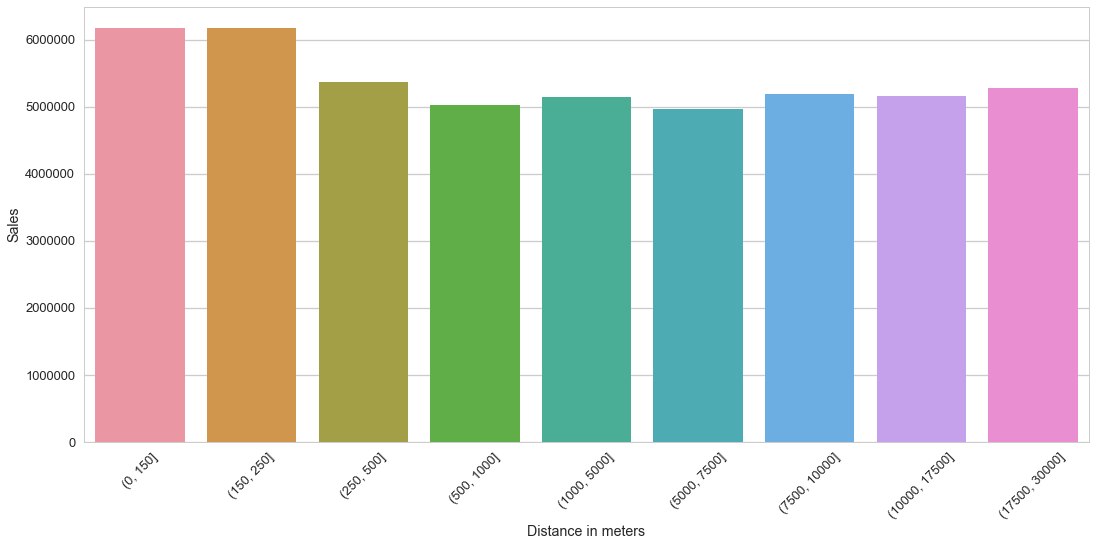

In [34]:
#merge 2 df
mm = pd.merge(trainsumbystore, store, on='Store')

#select needed cols
mm =mm[['CompetitionDistance','Sales']]

#create bins

bins = [0,150,250,500,1000, 5000, 7500,10000, 17500, 30000]

#create bins using the bins as values

mm['distanceBinned'] = pd.cut(mm['CompetitionDistance'], bins)

mmbinned = mm[['distanceBinned','Sales']]

mmbinned = mmbinned.groupby('distanceBinned').mean().reset_index()
mmbinned

#plot

plt.figure(figsize = (18,8))
plt.xticks(rotation=45)
ax = sns.barplot(x='distanceBinned', y='Sales', data = mmbinned)
ax.set(xlabel='Distance in meters')

sns.set_style('whitegrid')
sns.set_palette('Set3')

** 9 - How are the store types performing during the different promo intervals? **

The promo intervals are naming the months the promotion is starting. I wanted to know if the sales' performance was different by store types based on a specific promo interval. 

The idea is to come up with the best promo interval by store type!

The bar plot below will help us to answer the question. 

The best period for the store type 'c' is March, June, September and December, but for the store type 'b' it's January, April, July and October. 

Concerning the store type 'd', the first and second intervals are comparable, but feel free to look at the table below the graph for the precised totals. 

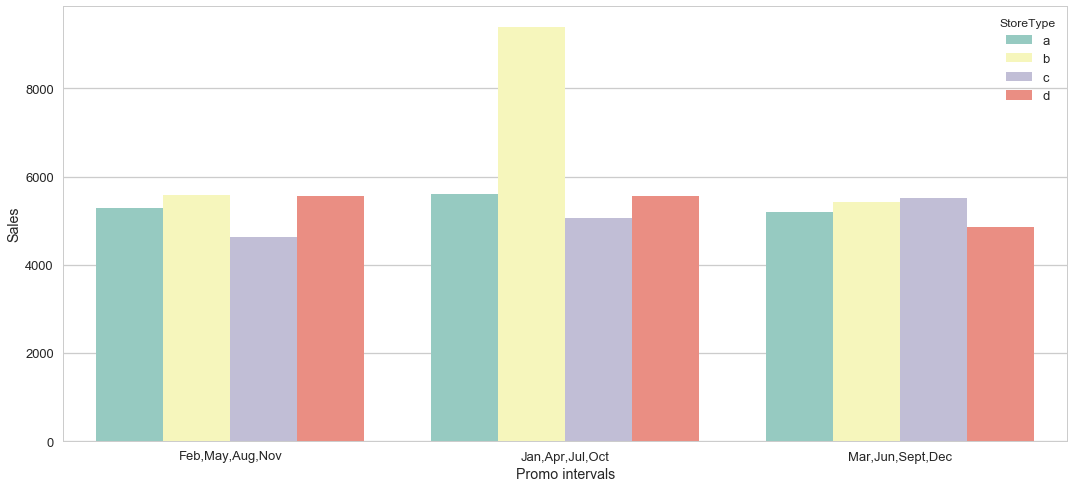

In [35]:
cc = mergedtable.groupby(['PromoInterval','StoreType']).mean().reset_index()
cc = cc[4:]
plt.figure(figsize = (18,8))
ax = sns.barplot(x='PromoInterval', y='Sales', data = cc, hue= 'StoreType')

sns.set_style('whitegrid')
sns.set_palette('Set3')
ax.set(xlabel='Promo intervals')

In [36]:
mergedtable[['PromoInterval','StoreType','Sales']].groupby(['StoreType','PromoInterval']).mean()

Sales
StoreType PromoInterval                 
a         0                  5977.170735
          Feb,May,Aug,Nov    5290.689767
          Jan,Apr,Jul,Oct    5610.174507
          Mar,Jun,Sept,Dec   5193.184480
b         0                 10910.845718
          Feb,May,Aug,Nov    5579.376858
          Jan,Apr,Jul,Oct    9389.151805
          Mar,Jun,Sept,Dec   5416.463061
c         0                  6343.296783
          Feb,May,Aug,Nov    4637.358406
          Jan,Apr,Jul,Oct    5060.329367
          Mar,Jun,Sept,Dec   5519.399122
d         0                  5933.084871
          Feb,May,Aug,Nov    5566.374114
          Jan,Apr,Jul,Oct    5550.979017
          Mar,Jun,Sept,Dec   4860.069039

**Conclusion **


In this first part we have been discovering the datasets, updating the data fields, but also creating data frames and new columns to facilitate the analysis and the understanding using a different kind of plots. 

We have learned that some characteristics can influence the sales, such as the store type, the assortments, the distance of the first competitor, the day of the week and the month:
 - December is the best performing month in terms of sales and ABS
 - The 1st, 16th and 30th of each month are the best performing days
 - Monday and Tuesday are the best performing days of the week
 - The best performing store-type is A
 - The promotions on impact the number of customers and by consequence the sales but this trend is not applicable for the stereotype B 
 - The distance from the 1st competitor that impact the sales positively is between 0 and 250 meters

Some insights might be useful to take into account to know how to influence the sales positively or any other metrics. 

In the second part, we are going to predict Rossmann's sales using Machine Learning Algorithms.

# Sales Prediction (Linear Regression)

In [37]:
#work in progress!

In [38]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [39]:
#mergedtable2 = mergedtable[mergedtable["Open"] != 0]

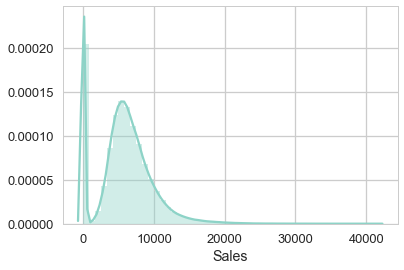

In [40]:
sns.distplot(mergedtable['Sales'])

In [41]:
mergedtable.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Month', 'Year', 'Day', 'Dayoftheweek',
       'Monthofyear', 'DayOfWeekCat', 'AOV', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [42]:
X = mergedtable[['Customers', 'CompetitionDistance']]

In [43]:
XX = mergedtable[['Store', 'Open','Promo','DayOfWeek']]

In [44]:
#X = mergedtable2[['Customers','CompetitionDistance']]

In [45]:
y = mergedtable[['Sales']]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
print(lm.intercept_)

[ 837.95199153]


In [50]:
#evaluate the model by checking the coefficients 
lm.coef_

array([[ 7.48200614,  0.03682071]])

In [51]:
#cdf = pd.DataFrame(lm.coef_, X.columns)

In [52]:
predictions = lm.predict(X_test)

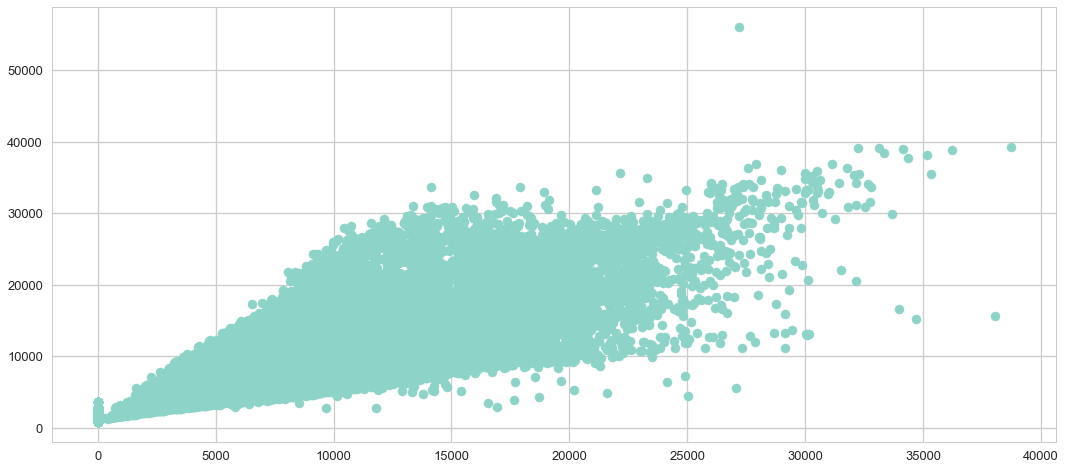

In [53]:
#compare the prediction with the real values
plt.figure(figsize = (18,8))
plt.scatter(y_test,predictions)

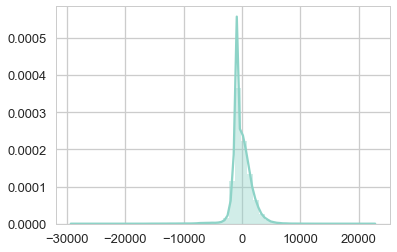

In [54]:
#get the distribution of the residuals
sns.distplot((y_test - predictions))

In [55]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((lm.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X_test, y_test))

Mean squared error: 2870056.10
Variance score: 0.81


In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.80574858197992882

The regression model is not ideal in this case being based on time, with seasonlity trends to take into account when forecasting.

In the following part we will be using Prophet in order to perform time series forecasting. 

In [57]:
train2 = pd.read_csv('train.csv')
train2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [58]:
train2 = train2[(train2["Open"] != 0) & (train2['Sales'] != 0)]
sales_c = train2[train2.Store == 1].loc[:, ['Date', 'Sales']]
sales_c.head()

,Date,Sales
0,2015-07-31,5263
1115,2015-07-30,5020
2230,2015-07-29,4782
3345,2015-07-28,5011
4460,2015-07-27,6102


In [59]:
#check the datatype - the date needs to be a datetime type
sales_c.dtypes

Date     object
Sales     int64
dtype: object

In [60]:
sales_c['Date'] = pd.DatetimeIndex(sales_c['Date'])
sales_c.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [61]:
#rename columns to fit the model
sales_c = sales_c.rename(columns={'Date': 'ds',
                        'Sales': 'y'})
sales_c.head()

,ds,y
0,2015-07-31,5263
1115,2015-07-30,5020
2230,2015-07-29,4782
3345,2015-07-28,5011
4460,2015-07-27,6102


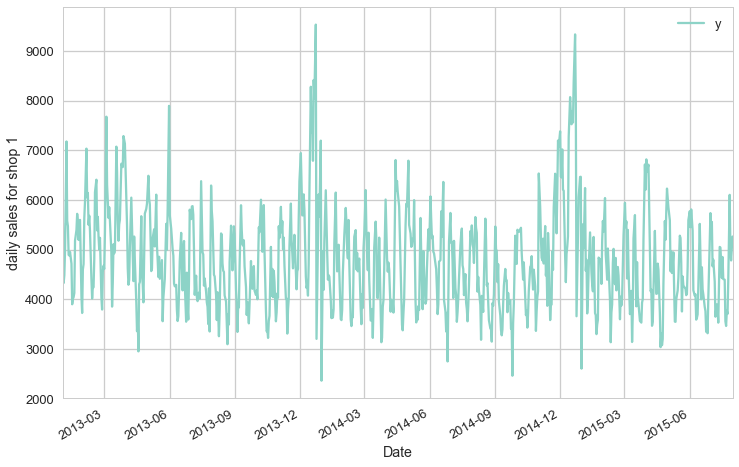

In [62]:
#plot the sales for the shop 1 over time 
ax = sales_c.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('daily sales for shop 1')
ax.set_xlabel('Date')

plt.show()

# Time Series Forecasting with Prophet

In [63]:
from fbprophet import Prophet

#define uncertainty interval 
my_model = Prophet(interval_width=0.95)
my_model.fit(sales_c)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [64]:
future_dates = my_model.make_future_dataframe(periods=6*7)

In [65]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
813,2015-09-02,3986.549366,2378.697347,5642.996096
814,2015-09-03,3878.771524,2234.431157,5577.981739
815,2015-09-04,4114.036637,2447.471307,5773.143094
816,2015-09-05,4299.511538,2534.640755,5846.925461
817,2015-09-06,4262.155637,2649.157590,5877.183344
818,2015-09-07,4497.908767,2735.777230,6156.852172
819,2015-09-08,3989.098086,2313.911929,5563.999881
820,2015-09-09,3855.925060,2207.420933,5391.821416
821,2015-09-10,3753.178062,2050.416469,5531.902245
822,2015-09-11,3997.578885,2311.215356,5620.203409


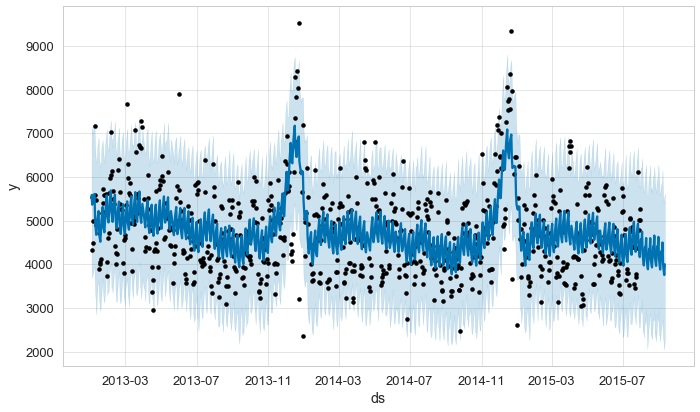

In [66]:
my_model.plot(forecast);

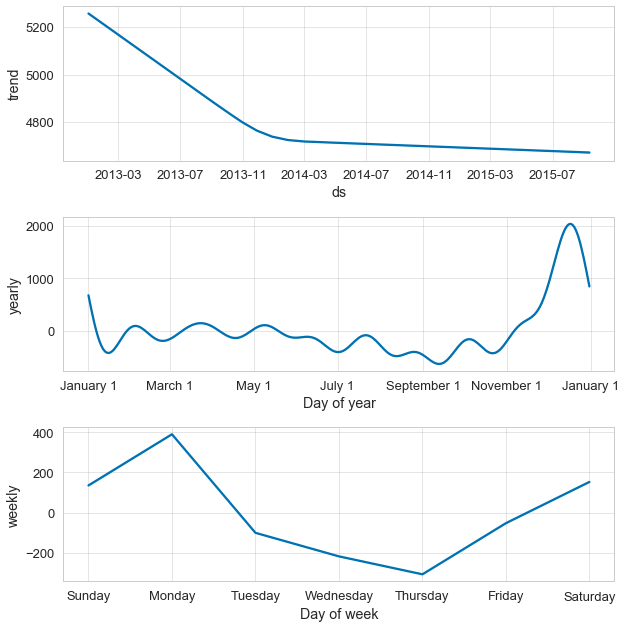

In [67]:
my_model.plot_components(forecast);

The last graphs as decribing the sales for the store 1 only.

The first graph shows the forecasted values for the next 6 weeks.
The 3 bottom graphs are returning the componements of our forecasts, yearly, daily and weekly patterns.

December and the holiday season is an important month, Monday and import day followed by Saturday and the sales a globally decreasing years after years. 